# Predicting price of used cars

Here, I have implemented application of supervised machine learning techniques to predict the price of used cars.
Different techniques like Simple Linear Regression Analysis, Support Vector Machines (SVM) have been used to make the predictions. The predictions are then evaluated and compared in order to find the algorithm which provides the best performance.

Predicting the price of used cars in both an important and interesting problem but it is not an simple task either.
The value of used cars depends on a number of factors. The most important ones are usually the age of the car, its make (and model), the origin of the car (the original country of the manufacturer), its mileage (the number of kilometers it has run) and its horsepower. Due to rising fuel prices, factors such as the type of fuel it uses, the interior style, the braking system, acceleration, the volume of its cylinders (measured in cc), safety index, its size, number of doors, paint colour, weight of the car, etc. all may influence price as well.

As we can see, the price depends on a large number of factors. Unfortunately, information about all these factors are
not always available and the buyer must make the decision to purchase at a certain
price based on few factors only. In this work, I have considered only a small subset of the factors mentioned above.

### Problem statement


  
The basic problem is to find out good regression model that can give the accurate price for the vehicle.In order to solve this, the data of the car with their attributes and re-sell prices is provided. The attributes of the car being independent variables or input while price being the dependent variable or output.We have to find the unknown function that explains the relationship between them.
    

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading dataset

In [3]:
car=pd.read_csv("car_dataset.csv")

In [4]:
car.head(25)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.00,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV


In [5]:
car.shape

(4345, 9)

### Let's get some idea of the features of dataset

Brand - Brand of the car like BMW, Mercedes-Benz, Audi, Toyota, etc.

Price - Current price of the car

Body - Refers to the shape (car body) of a particular car such as sedan, van, crossover, vagon, etc

Mileage - Number of miles the car has been driven

Engine Type - Fuel that is used to provide power to the car like Petrol, Disel, gas, etc.

Registration - Whether the car is registerd or not.

Year - Year of manufacture of car

Model: Specific models for each car manufacturer such as Sprinter 212, Rav4, Clio,etc.



    

    


 
 




## Data preprocessing

In [6]:
car.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [7]:
car.dropna(inplace=True)

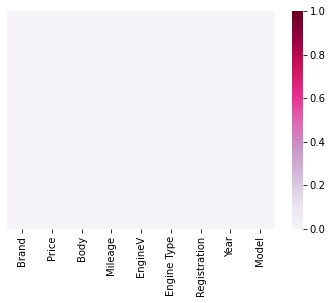

In [8]:
heat_map=sns.heatmap(car.isnull(),yticklabels=False,cbar=True,cmap="PuRd",vmin=0,vmax=1)

Here we can see there are no null values left in dataset.

In [9]:
car.drop('Model',axis=1,inplace=True)

In [10]:
car.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


A dummy variable is a numerical variable used in regression analysis to represent subgroups of the sample in analysis.In the simplest case, we would use a 0,1 dummy variable where a person is given a value of 0 if they are in the control group or a 1 if they are in the treated group. Dummy variables are useful because they enable us to use a single regression equation to represent multiple groups. This means that we don’t need to write out separate equation models for each subgroup.

So here, we are going to create dummy variables for columns like Brand, Body, Engine Type, Registration.

In [11]:
car_dummies=pd.get_dummies(car,columns=['Brand','Body','Engine Type','Registration'],drop_first=True)

In [12]:
car_dummies

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,1991,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,1999,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,2003,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,17900.0,35,1.6,2014,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
4340,125000.0,9,3.0,2014,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4341,6500.0,1,3.5,1999,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
4342,8000.0,194,2.0,1985,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


<AxesSubplot:xlabel='Price', ylabel='Density'>

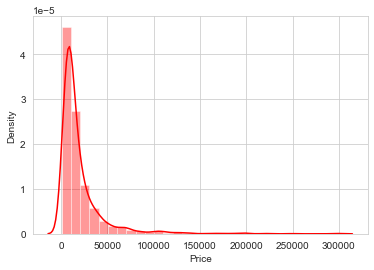

In [16]:
sns.set_style('whitegrid') 
sns.distplot(car['Price'], kde = True, color ='red', bins = 30) 

Scaling of price feature by log transformation

In the regression model, for any fixed value of X, Y is distributed in this problem data-target value (Price ) not normally distributed, it is right skewed. To solve this problem, the log transformation on the target variable is applied when it has skewed distribution and we need to apply an inverse function on the predicted values to get the actual predicted target value.

In [17]:
car_dummies['log10_price'] = np.log10(car_dummies['Price'])

Explanation:

KDE stands for Kernel Density Estimation and that is another kind of the plot in seaborn.
bins is used to set the number of bins you want in your plot and it actually depends on your dataset.
color is used to specify the color of the plot
Now looking at this we can say that most of the Price given lies between 0 and 50000.

From that we can say that we have positively or right skewed data so we have to use log transformation to make data normally distributed.

<AxesSubplot:xlabel='log10_price', ylabel='Density'>

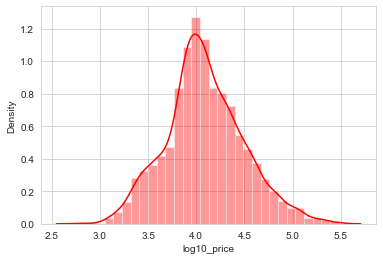

In [18]:
sns.set_style('whitegrid') 
sns.distplot(car_dummies['log10_price'], kde = True, color ='red', bins = 30) 

Now as we can see, the data is quite normally distributed.

## Exploratory Data Analysis

### Fuel Type

In [25]:
sns.set_style('dark')

<AxesSubplot:xlabel='Engine Type', ylabel='count'>

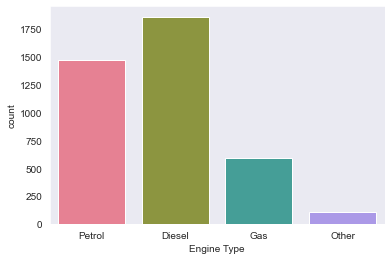

In [26]:
sns.countplot(data=car,x='Engine Type',palette='husl')

### Inference

From this we can say that disel has highest user group i.e. 48% then petrol 37% followed by gas 12% and others 3%

Number of disel fueled cars are more.

### Body Type

In [21]:
sns.set_style('dark')

<AxesSubplot:xlabel='Body', ylabel='count'>

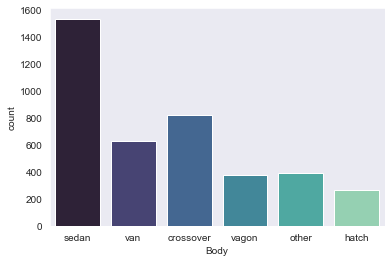

In [22]:
sns.countplot(data=car,x='Body',palette='mako')

### Inference

Most produced vehicle are of body type sedan i.e. around 37.95%

Sedan followed crossover 20.74%, van 15.54%, vagon 9.25%, hatch 6.56% and others 9.97%

From above, we can observe that Sedan is most preferred body type.

### Brand

In [27]:
sns.set_style('dark')

<AxesSubplot:xlabel='Brand', ylabel='count'>

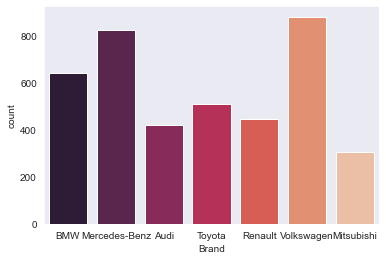

In [28]:
sns.countplot(data=car,x='Brand',palette='rocket')

### Inference

From here, we can conclude approximately that

Volkswagen = 24%

Mercedes-Benz = 20%

BMW = 16%

Toyota = 12%

Renault = 11%

Audi = 11%

Mitsubishi = 6%


Means Volkswagen seem to be most favoured car company.

### Registered cars

In [30]:
sns.set_style('dark')

<AxesSubplot:xlabel='Registration', ylabel='count'>

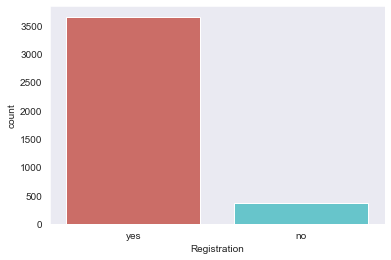

In [31]:
sns.countplot(data=car,x='Registration',palette='hls')

### Inference

More than 90% cars are registered and remaining are not.

### Year

In [34]:
sns.set_style('dark')

<AxesSubplot:xlabel='Year', ylabel='count'>

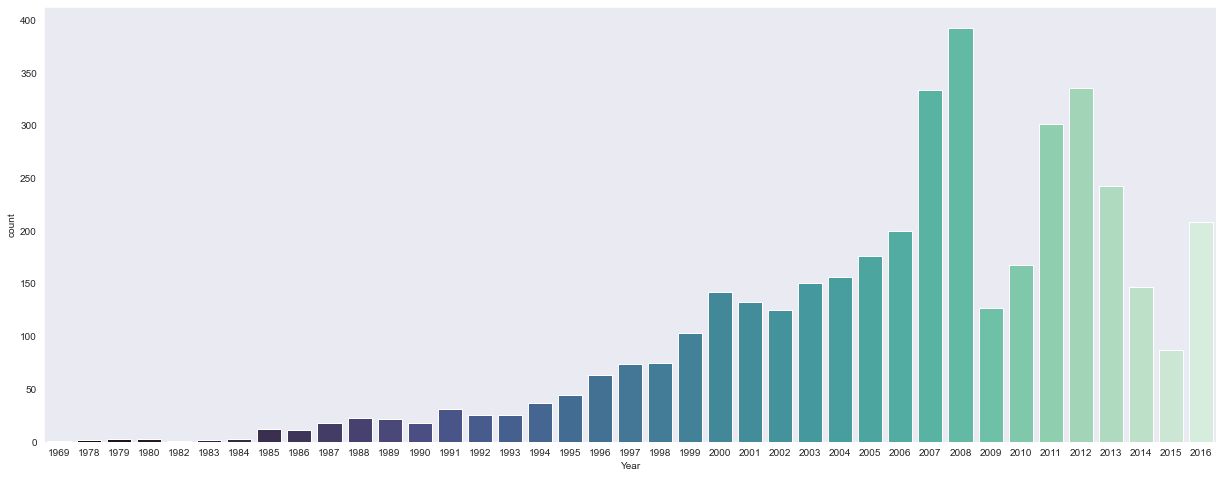

In [35]:
plt.figure(figsize=(21, 8))
sns.countplot(data=car,x='Year',palette='mako')


### Inference

Here we can see the maximum number of cars were manufactured in 2008.

### Correlation matrix

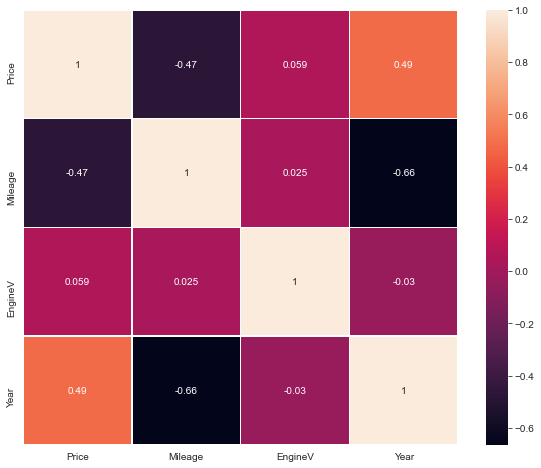

In [22]:
a = sns.heatmap(car.corr(), annot=True, linewidths=.5, square= True)
a.figure.set_size_inches(10,8)

### Inference

This indicates the correlation between all the columns.
The lighter the color, the larger the correlation magnitude. 
It is a measure of the linear association between two variables. It has a value between -1 and 1 where:

-1 indicates a perfectly negative linear correlation between two variables.
0 indicates no linear correlation between two variables.
1 indicates a perfectly positive linear correlation between two variables.

For example we can say that mileage and year have nagative linear correlation or inverse correlation in which one variable increases as the other decreases or vice versa.
The more used car it is the less is the mileage.

There is high correlation between Year and Price column.

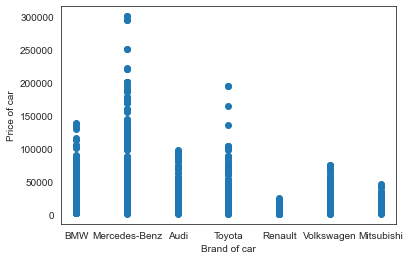

In [31]:
plt.scatter(car['Brand'],car['Price'])
plt.xlabel('Brand of car')
plt.ylabel('Price of car')
plt.show()

### Inference

A scatter plot is a diagram where each value in the data set is represented by a dot.


Here, we can see that highest price is of brand Mercedes-Benz followed by Toyota, BMW, Audi, Volkswagen, Mitsubishi.

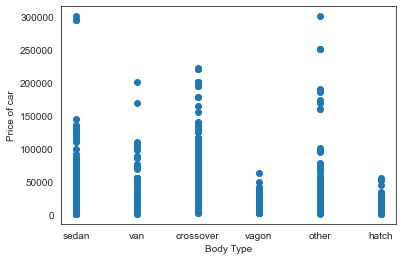

In [32]:
plt.scatter(car['Body'], car['Price'])
plt.xlabel('Body Type')
plt.ylabel('Price of car')
plt.show()

### Inference

Body type Sedan is having maximum price than others.

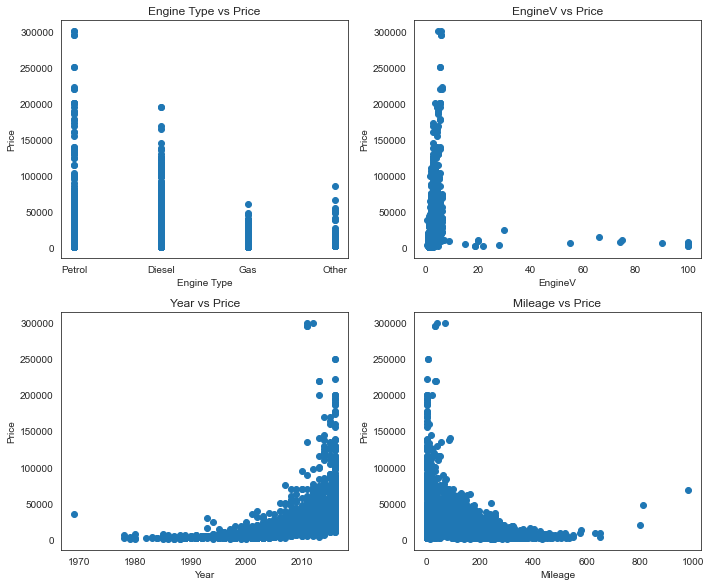

In [33]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(car[x],car['Price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('Engine Type', 1)
scatter('EngineV', 2)
scatter('Year', 3)
scatter('Mileage', 4)

plt.tight_layout()

#### Inference

Petrol has highest average price than disel, gas and other fuels.

In [34]:
car_dummies.columns = car_dummies.columns.to_series().apply(lambda x: x.strip())

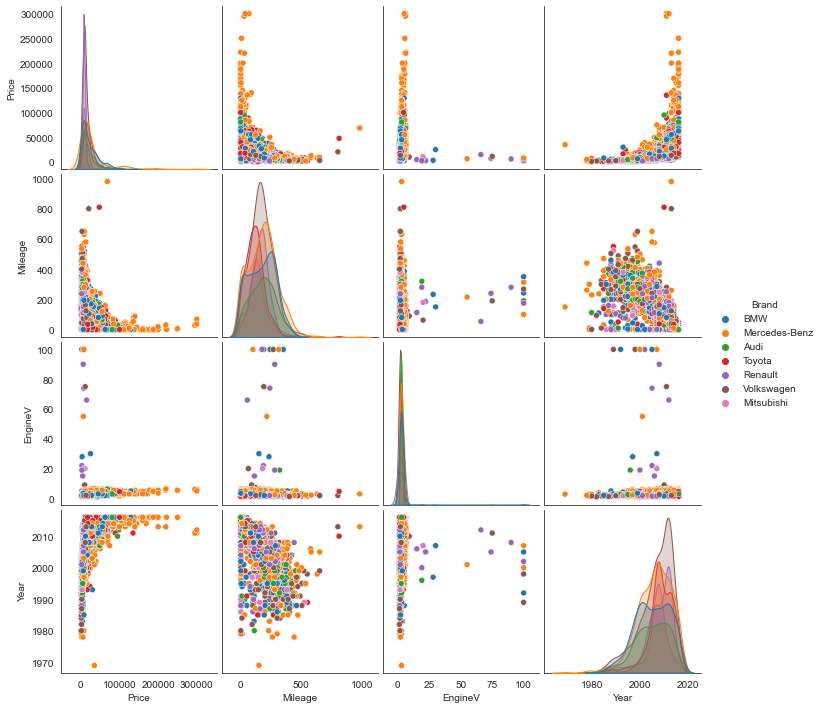

In [35]:
sns.pairplot(car[['Price','Mileage','EngineV','Year','Brand']],hue = 'Brand')

In [36]:
df=car.groupby(['Brand']).sum()
df

,Price,Mileage,EngineV,Year
Brand,,,,
Audi,7940770.00,75888,1105.27,842032
BMW,15134836.25,111026,2053.58,1283221
Mercedes-Benz,25369636.00,150469,2718.06,1650780
Mitsubishi,3500830.30,43468,703.10,615949
Renault,3589669.92,69720,1113.04,893658
Toyota,11614109.21,60015,1400.55,1024263
Volkswagen,11548188.28,147792,2033.86,1765775


# Model - Linear Regression

In [28]:
target = car_dummies['log10_price']       #dependent variable(y)
inputs = car_dummies.drop(['log10_price'],axis = 1)    #independent variable(x)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [30]:
inputs_scaled = scaler.transform(inputs)

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.3, random_state=365)

In [32]:
x_train.shape

(2817, 19)

In [33]:
x_test.shape

(1208, 19)

In [34]:
y_train.shape

(2817,)

In [35]:
y_test.shape

(1208,)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [38]:
coef_df = pd.DataFrame(reg.coef_, inputs.columns, columns=['Coefficient'])

In [39]:
coef_df

,Coefficient
Price,0.146617
Mileage,-0.009033
EngineV,0.003147
Year,0.198973
Brand_BMW,0.007092
Brand_Mercedes-Benz,-0.002444
Brand_Mitsubishi,-0.051743
Brand_Renault,-0.087149
Brand_Toyota,-0.025916
Brand_Volkswagen,-0.051564


In [40]:
reg.score(x_train, y_train)

0.9206009809749304

In [41]:
reg.score(x_test,y_test)

0.908204201280291

The above score tells that our model is 92% accurate with the training dataset and 90% accurate with the test dataset.

In [42]:
reg.intercept_

4.085333062251086

In [43]:
predictions = reg.predict(x_test)

Text(0.5, 1.0, 'Actual v/s Predicted')

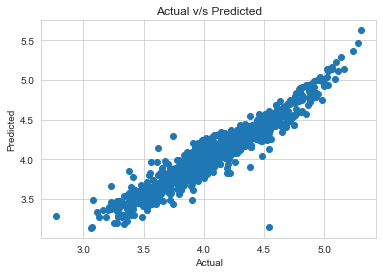

In [44]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual v/s Predicted')

<AxesSubplot:ylabel='Density'>

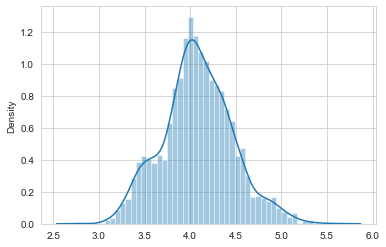

In [45]:
sns.distplot((y_test, predictions), bins=50)

We can see here the graph is in bell shaped which is normalised and it says that our model is well predicted.

In [46]:
#Evaluate the model

from sklearn.metrics import r2_score

In [47]:
r2value = r2_score(y_test, predictions)
r2value

0.908204201280291

R-squared is a goodness-of-fit measure for linear regression models.  Higher R-squared values represent smaller differences between the observed data and the fitted values.

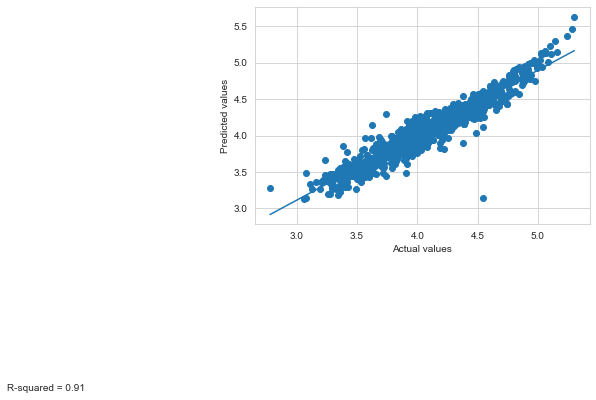

In [48]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predictions, 1))(np.unique(y_test)))

plt.text(0.6, 0.5, 'R-squared = %0.2f' % r2value)
plt.show()

Visually we can demonstrate how R-squared values represent the scatter around the regression line, we can plot the fitted values by observed values.
As the regression model accounts for more of the variance, Here we can see that data points are closer to the regression line.

# Support Vector Machines

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(inputs_scaled,target,test_size=0.3,random_state=0)

In [51]:
from sklearn.svm import SVR

In [52]:
regressor = SVR(kernel='rbf', C=1e3, gamma=0.1)

In [53]:
regressor.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [54]:
#Training score
regressor.score(x_train,y_train)   

0.9775903626071772

In [55]:
#Testing score
regressor.score(x_test,y_test)

0.9409221582325191

It tells that model is 97% accurate with train set and 94% accurate with test set.

In [56]:
predictions = regressor.predict(x_test)
predictions

array([3.90101654, 4.40876525, 4.34485044, ..., 4.82308367, 3.59037479,
       4.59173803])

#### So, overall both the models give decent accuracy score. However,Accuracy of SVM is quite well than Linear Regression Analysis.

In [57]:
import pickle

file = open('model.pkl', 'wb')

pickle.dump(regressor, file)